# PCA

Code from [geeksforgeeks.com](https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/)

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
# Import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()
 
# Check the output classes
print('Classes:', data['target_names'], '\n')
 
# Check the input attributes
print('Attributes:', data['feature_names'])

Classes: ['malignant' 'benign'] 

Attributes: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [83]:
# Construct a dataframe using pandas
df1 = pd.DataFrame(data['data'], columns=data['feature_names'])

# Scale data befor applying PCA
scaling = StandardScaler()

# Use fit and transform method
scaling.fit(df1)
scaled_data = scaling.transform(df1)

# Set the n_components=3
principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(569, 3)


In [84]:
# Check the values of eigen vectors produced by principal components
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853125,  0.0645499 , -0.00931423,  0.02869953, -0.10429196,
        -0.07409156,  0.00273385, -0.02556353, -0

Text(0, 0.5, 'pc2')

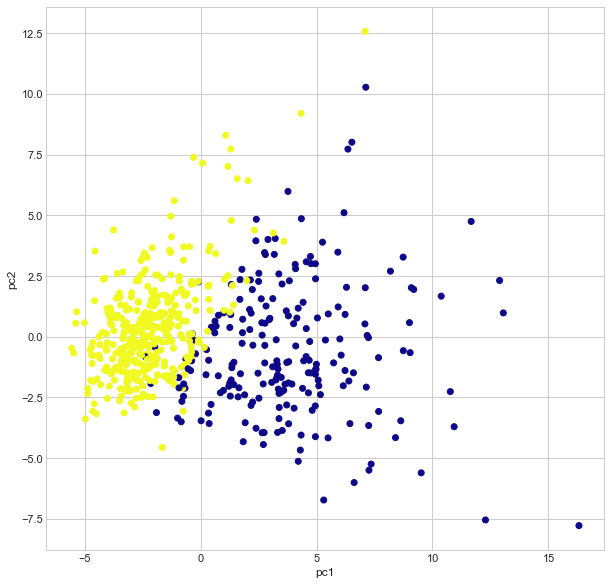

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=data['target'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

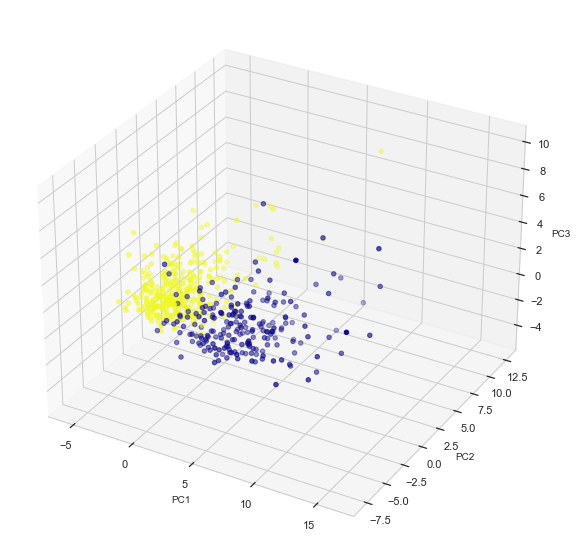

In [86]:
# Import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# Choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0] is pc1, x[:,1] is pc2, x[:,2] is pc3
axis.scatter(x[:,0], x[:,1], x[:,2], c=data['target'], cmap='plasma')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)

In [87]:
# Check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


Text(0.5, 1.0, 'Explained Variance Scree Plot')

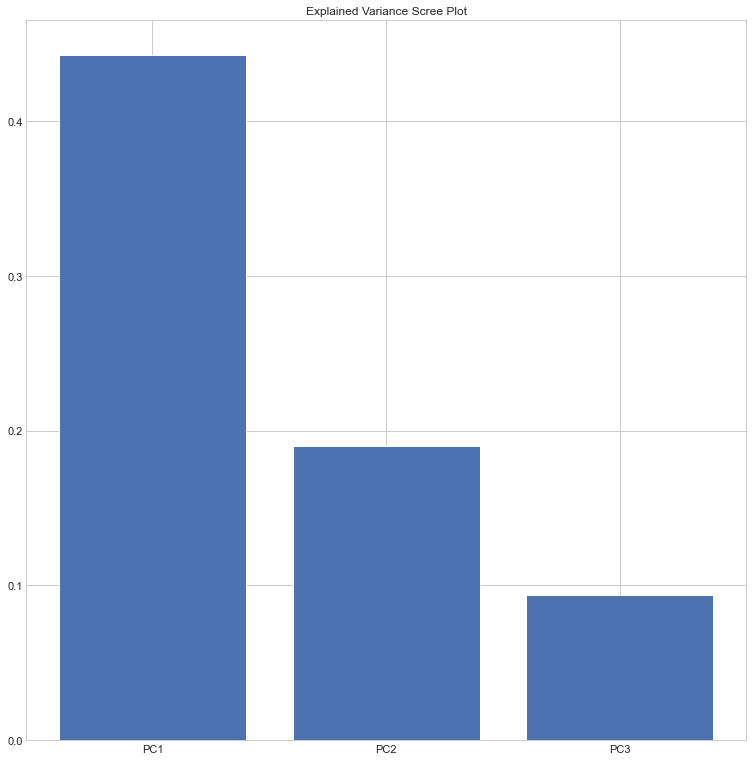

In [88]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0, 0, 1, 1])
components = ['PC1', 'PC2', 'PC3']
ax.bar(components, principal.explained_variance_ratio_)
ax.set_title('Explained Variance Scree Plot')

# MDS

Code from [towardsdatascience.com](https://towardsdatascience.com/visualize-multidimensional-datasets-with-mds-64d7b4c16eaa)

In [89]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [90]:
data = load_iris()
X = data.data

In [91]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
mds = MDS(2, random_state=0)
X_2d = mds.fit_transform(X_scaled)

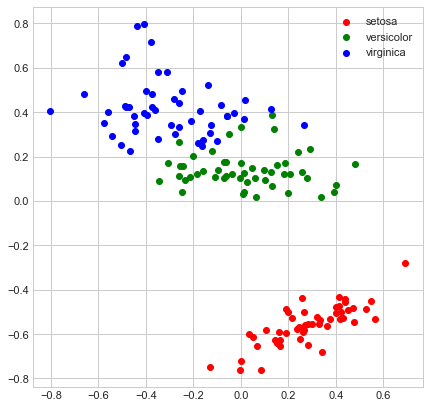

In [93]:
colors = ['red', 'green', 'blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in np.unique(data.target):
    subset = X_2d[data.target == i]

    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x, y, c=colors[i], label=data.target_names[i])
plt.legend()
plt.show()

# tSNE

Code from [datatechnotes.com](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html)

In [94]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from numpy import reshape
import seaborn as sns
import pandas as pd

In [95]:
(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape) 

(3000, 28, 28)


In [96]:
print(x_train.shape)
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

(3000, 28, 28)
(3000, 784)


/home/stark/anaconda3/envs/independent-study/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/stark/anaconda3/envs/independent-study/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.366295
[t-SNE] KL divergence after 1000 iterations: 1.271635


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

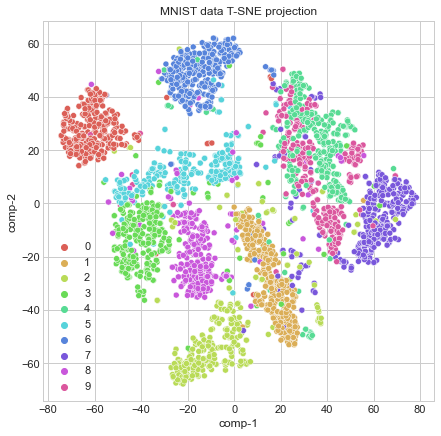

In [97]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

# Clustering

Based on code from [thecleverprogrammer.com](https://thecleverprogrammer.com/2021/08/11/agglomerative-clustering-in-machine-learning/)

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
sns.set()

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [100]:
data["Income"] = data[["Annual Income (k$)"]]
data["Spending"] = data[["Spending Score (1-100)"]]
data = data[["Income", "Spending"]]
print(data.head())

   Income  Spending
0      15        39
1      15        81
2      16         6
3      16        77
4      17        40


## Agglomerative Clustering

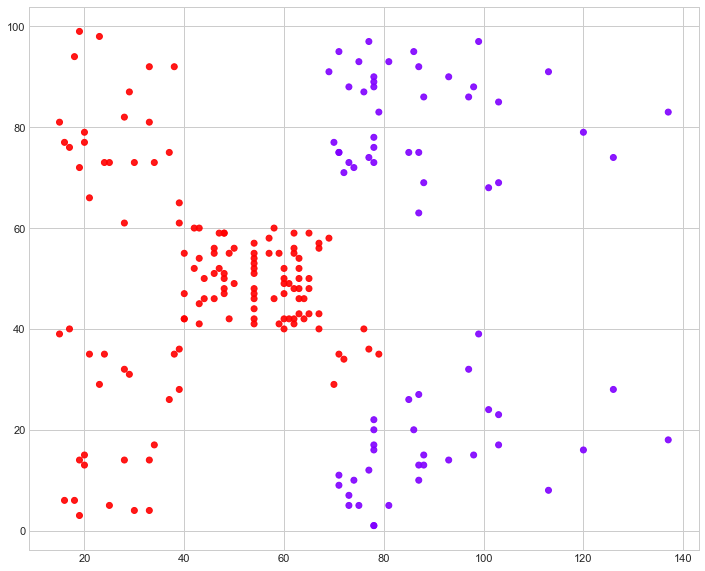

In [101]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model.fit(data)
pred = model.fit_predict(data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

## K-Means Clustering

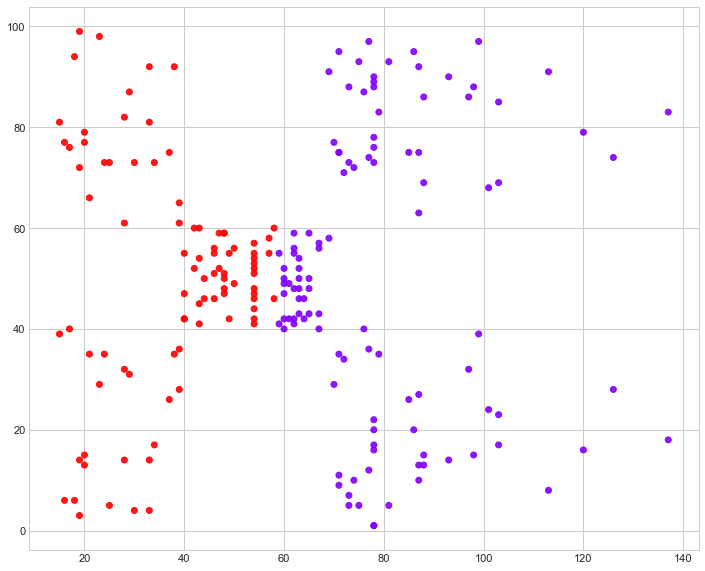

In [102]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(data)
pred = model.fit_predict(data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

## DBSCAN

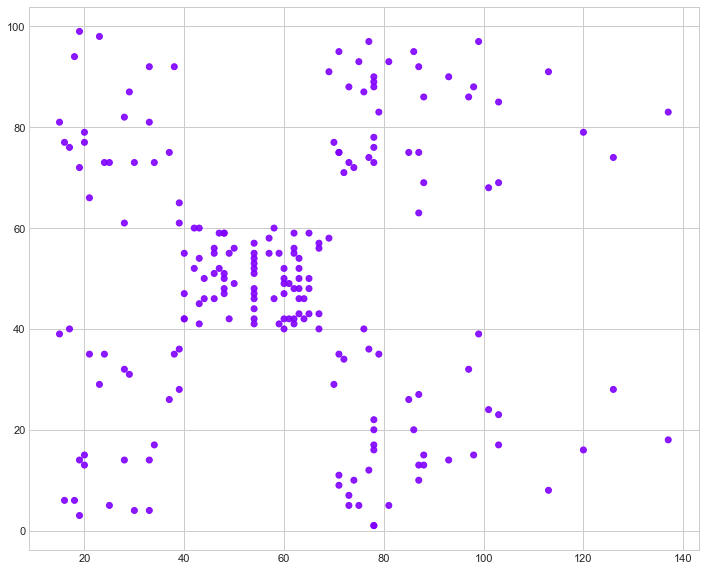

In [103]:
from sklearn.cluster import DBSCAN
model = DBSCAN()
model.fit(data)
pred = model.fit_predict(data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

# LDA

Code based off [Iris LDA code by SETScholars](https://setscholars.net/how-to-implement-lda-in-python-with-scikit-learn/) 

In [104]:
from os.path import exists, join
from os import mkdir
import kaggle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [105]:
# Make sure datasets directory exists
if not exists(join('learning', 'datasets')):
    mkdir(join('learning', 'datasets'))

# Download dataset
dataset_path = join('learning', 'datasets', 'wine-supervised')
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('akhil0007/wine-data', dataset_path, unzip=True)

In [106]:
# Load dataset
df = pd.read_csv(join(dataset_path, 'wine.data'), header=None)

# Drop weird numbers
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

print(df.shape)

(178, 14)


In [107]:
# X is feature set, y is label set
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
num_components = 2
lda = LDA(n_components=num_components)
x = lda.fit_transform(X_train, y_train)

x = pd.DataFrame(x, columns=[f'LD{i+1}' for i in range(num_components)])
print(x.shape)

(142, 2)


Text(0, 0.5, 'LD2')

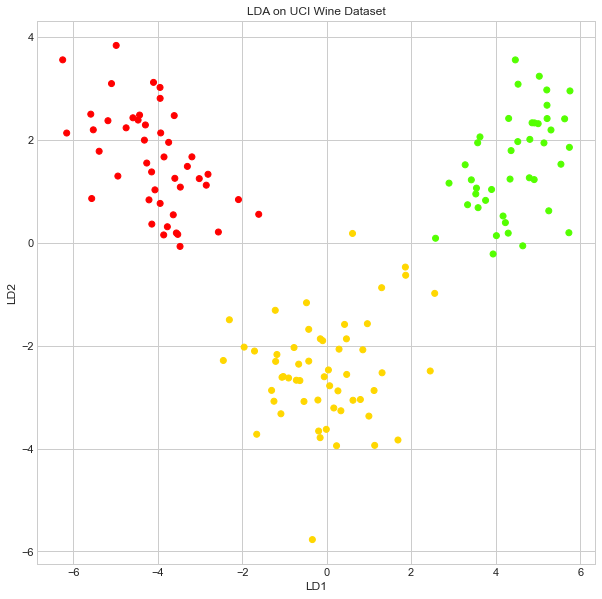

In [110]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x['LD1'], x['LD2'], c=y_train, cmap='prism')
plt.title('LDA on UCI Wine Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')

# SVMs

Based on code from [valuem1.com](https://valueml.com/learning-to-classify-wines-using-scikit-learn/)

In [111]:
from sklearn import svm
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

## Linear Kernel

In [113]:
# Create a svm Classifier
clf = svm.SVC(kernel='linear') 

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


## Polynomial Kernel

In [114]:
# Create a svm Classifier
clf = svm.SVC(kernel='poly') 

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


## Radial Basis Kernel

In [115]:
# Create a svm Classifier
clf = svm.SVC(kernel='rbf') 

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


# Random Forests

In [116]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)
X_train_scaled = preprocessing.scale(X_train)

In [118]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
confidence = classifier.score(X_test, y_test)
print(f'Confidence: {confidence}')

Confidence: 0.9722222222222222


In [120]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 2 1 1 2 2 1 1 0 1 0 0 0 2 0 2 0 1 0 2 0 2 1 0 2 0 1 1 2 2 2 0 1 2 1 1]
[0 2 1 1 2 2 1 1 0 1 0 0 0 2 0 2 0 1 0 2 0 2 1 0 2 0 1 1 1 2 2 0 1 2 1 1]


In [121]:
feature_imp = pd.Series(classifier.feature_importances_,index=wine.feature_names).sort_values(ascending=False)
feature_imp

proline                         0.174605
color_intensity                 0.154909
flavanoids                      0.134201
od280/od315_of_diluted_wines    0.131777
alcohol                         0.130786
hue                             0.072157
total_phenols                   0.060858
alcalinity_of_ash               0.029825
proanthocyanins                 0.028106
magnesium                       0.026229
malic_acid                      0.025736
ash                             0.017208
nonflavanoid_phenols            0.013603
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


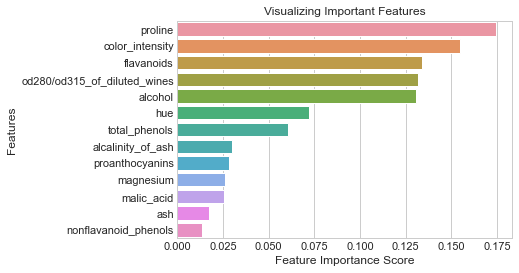

In [122]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()